# Imports and Defaults

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
sns.set_theme(style="whitegrid", font_scale=2.5)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "figure.dpi": 300,
})

# Import Data

In [4]:
posteriors = [
    "eight_schools-eight_schools_centered",
    "normal50",
    "irt_2pl",
    "stochastic_volatility",
]
hyper_param = "baseline"

In [5]:
def get_df(posterior):
    fname = os.path.join("../../data/", posterior, "summary.csv")
    return pd.read_csv(fname, header=0)

In [6]:
data = []
for posterior in posteriors:
    df = get_df(posterior)
    df = df[df["tags"] == hyper_param]
    
    
    df = df.assign(new_column="eight_schools" if posterior == "eight_schools-eight_schools_centered" else posterior)
    df = df.rename(columns={"new_column": "Posterior"})
    sampler_dict = {"drghmc": "DR-G-HMC", "nuts": "NUTS", "drhmc": "DR-HMC"}
    df["sampler_type"] = df["sampler_type"].apply(lambda x: sampler_dict[x] if x in sampler_dict else x)
    data.append(df)
data = pd.concat(data, ignore_index=True)

In [7]:
data = data.melt(id_vars=["Posterior", "sampler_type"], value_vars=["error_param", "error_param_squared"], var_name="Error Type", value_name="Error")

# Plot Data

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Error in Variance ($\\mathcal{L}_{\\theta^2, T}$)')

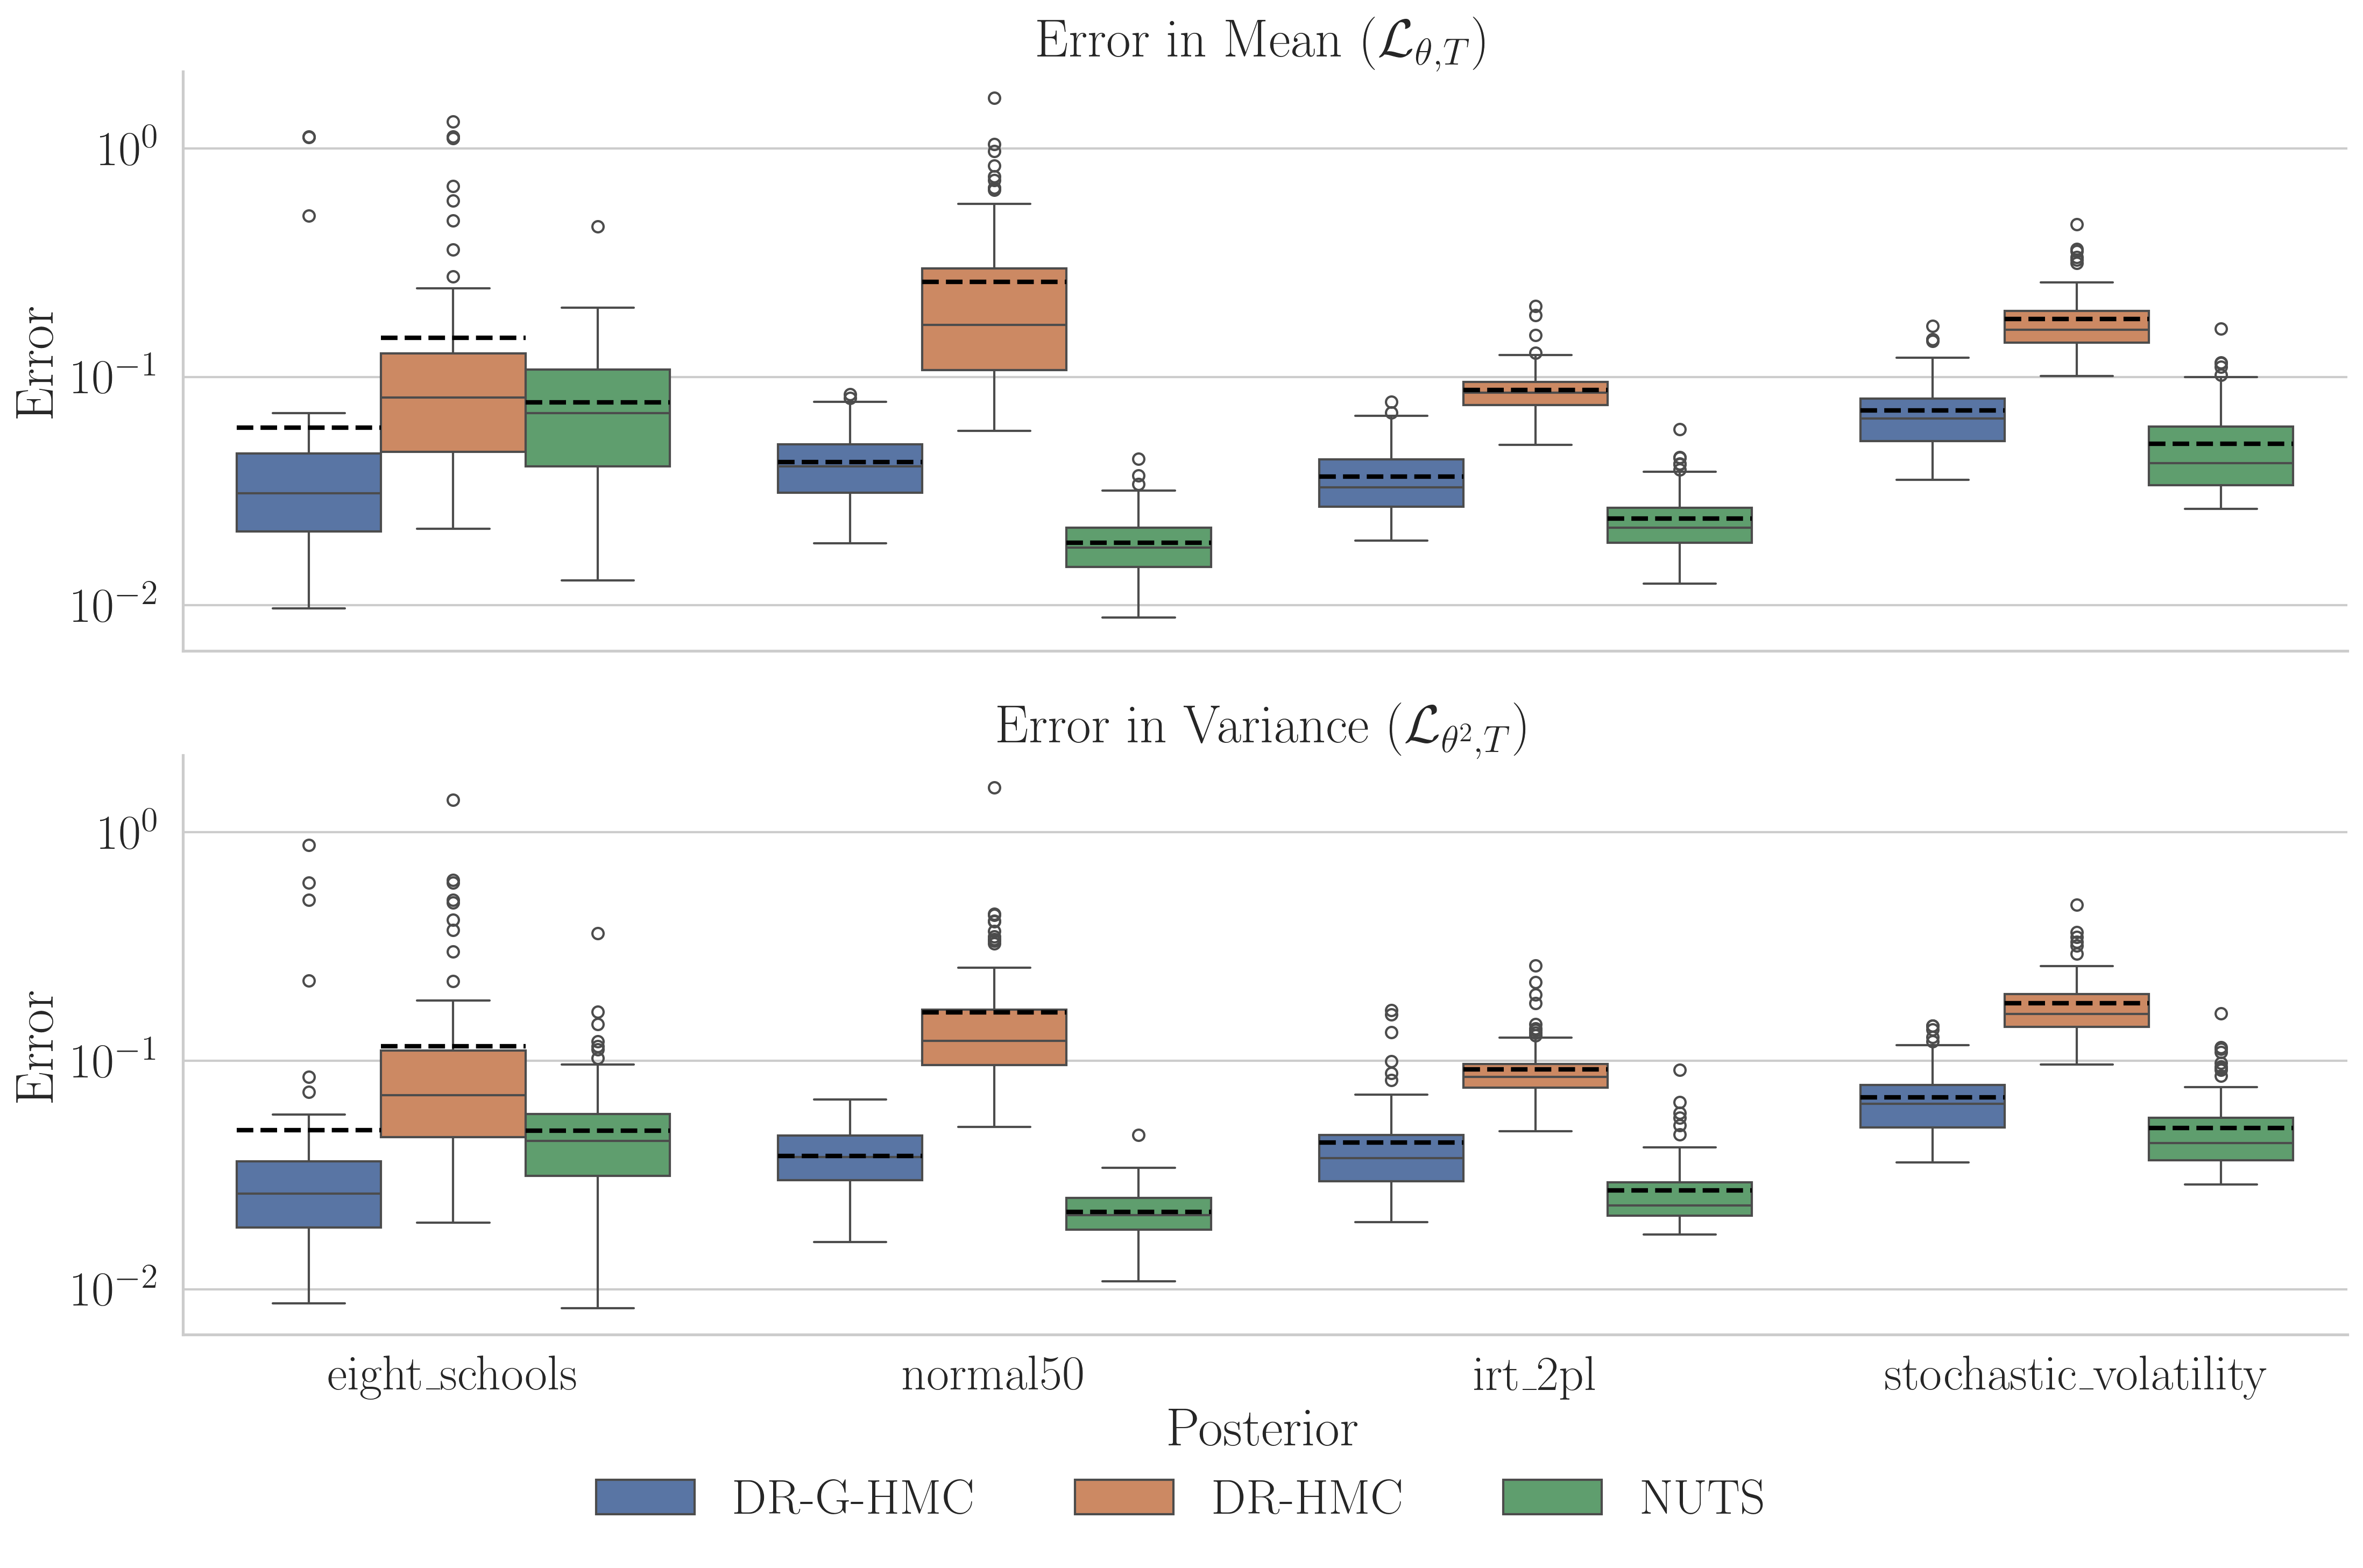

In [8]:
fig = sns.catplot(
    data=data,
    kind="box",
    y="Error",
    x="Posterior",
    hue="sampler_type",
    hue_order=["DR-G-HMC", "DR-HMC", "NUTS"],
    row="Error Type",
    aspect=3,
    showmeans=True,
    meanline=True,
    meanprops=dict(linestyle="--", linewidth=2, color="black"),
)

fig.set(yscale="log")
fig.figure.subplots_adjust(bottom=0.15)
sns.move_legend(fig, "lower center", ncol=3, title="")

# fig.set_titles("")
# fig.axes.flat[0].set_ylabel(r'Error in Mean ($\mathcal{L}_{\theta, T}$)')
# fig.axes.flat[1].set_ylabel(r'Error in Variance ($\mathcal{L}_{\theta^2, T}$)')

fig.set_ylabels("Error")
fig.axes.flat[0].set_title(r'Error in Mean ($\mathcal{L}_{\theta, T}$)')
fig.axes.flat[1].set_title(r'Error in Variance ($\mathcal{L}_{\theta^2, T}$)')

# Robust Hyper Params

In [128]:
posteriors = ["funnel10", "normal50", "eight_schools-eight_schools_centered"]
hyper_param = "step_size_factor"

In [129]:
def get_df(posterior):
    fname = os.path.join("../../data/", posterior, "summary.csv")
    return pd.read_csv(fname)

data = []
for posterior in posteriors:
    df = get_df(posterior)
    df = df[df["tags"] == hyper_param]
    df = df.assign(new_column="eight_schools" if posterior == "eight_schools-eight_schools_centered" else posterior)
    df = df.rename(columns={"new_column": "Posterior"})
    
    posterior_dict = {"funnel10": "funnel10", "normal50": "normal100", "eight_schools-eight_schools_centered": "eight_schools"}
    df["Posterior"] = df["Posterior"].apply(lambda x: posterior_dict[x] if x in posterior_dict else x)
    sampler_dict = {"drghmc": "DR-G-HMC", "nuts": "NUTS", "drhmc": "DR-HMC"}
    df["sampler_type"] = df["sampler_type"].apply(lambda x: sampler_dict[x] if x in sampler_dict else x)
    data.append(df)
data = pd.concat(data, ignore_index=True)

In [130]:
data = data.melt(id_vars=["sampler_type", "Posterior", hyper_param], value_vars=["error_param", "error_param_squared"], var_name="Error Type", value_name="Error")

# unique sampler_type values sorted alphabetically
hue_order = sorted(data["sampler_type"].unique().tolist())
row_order = sorted(data["Posterior"].unique().tolist())
row_order = ["funnel10", "eight_schools", "normal100"]

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Error in Variance ($\\mathcal{L}_{\\theta^2, T}$)')

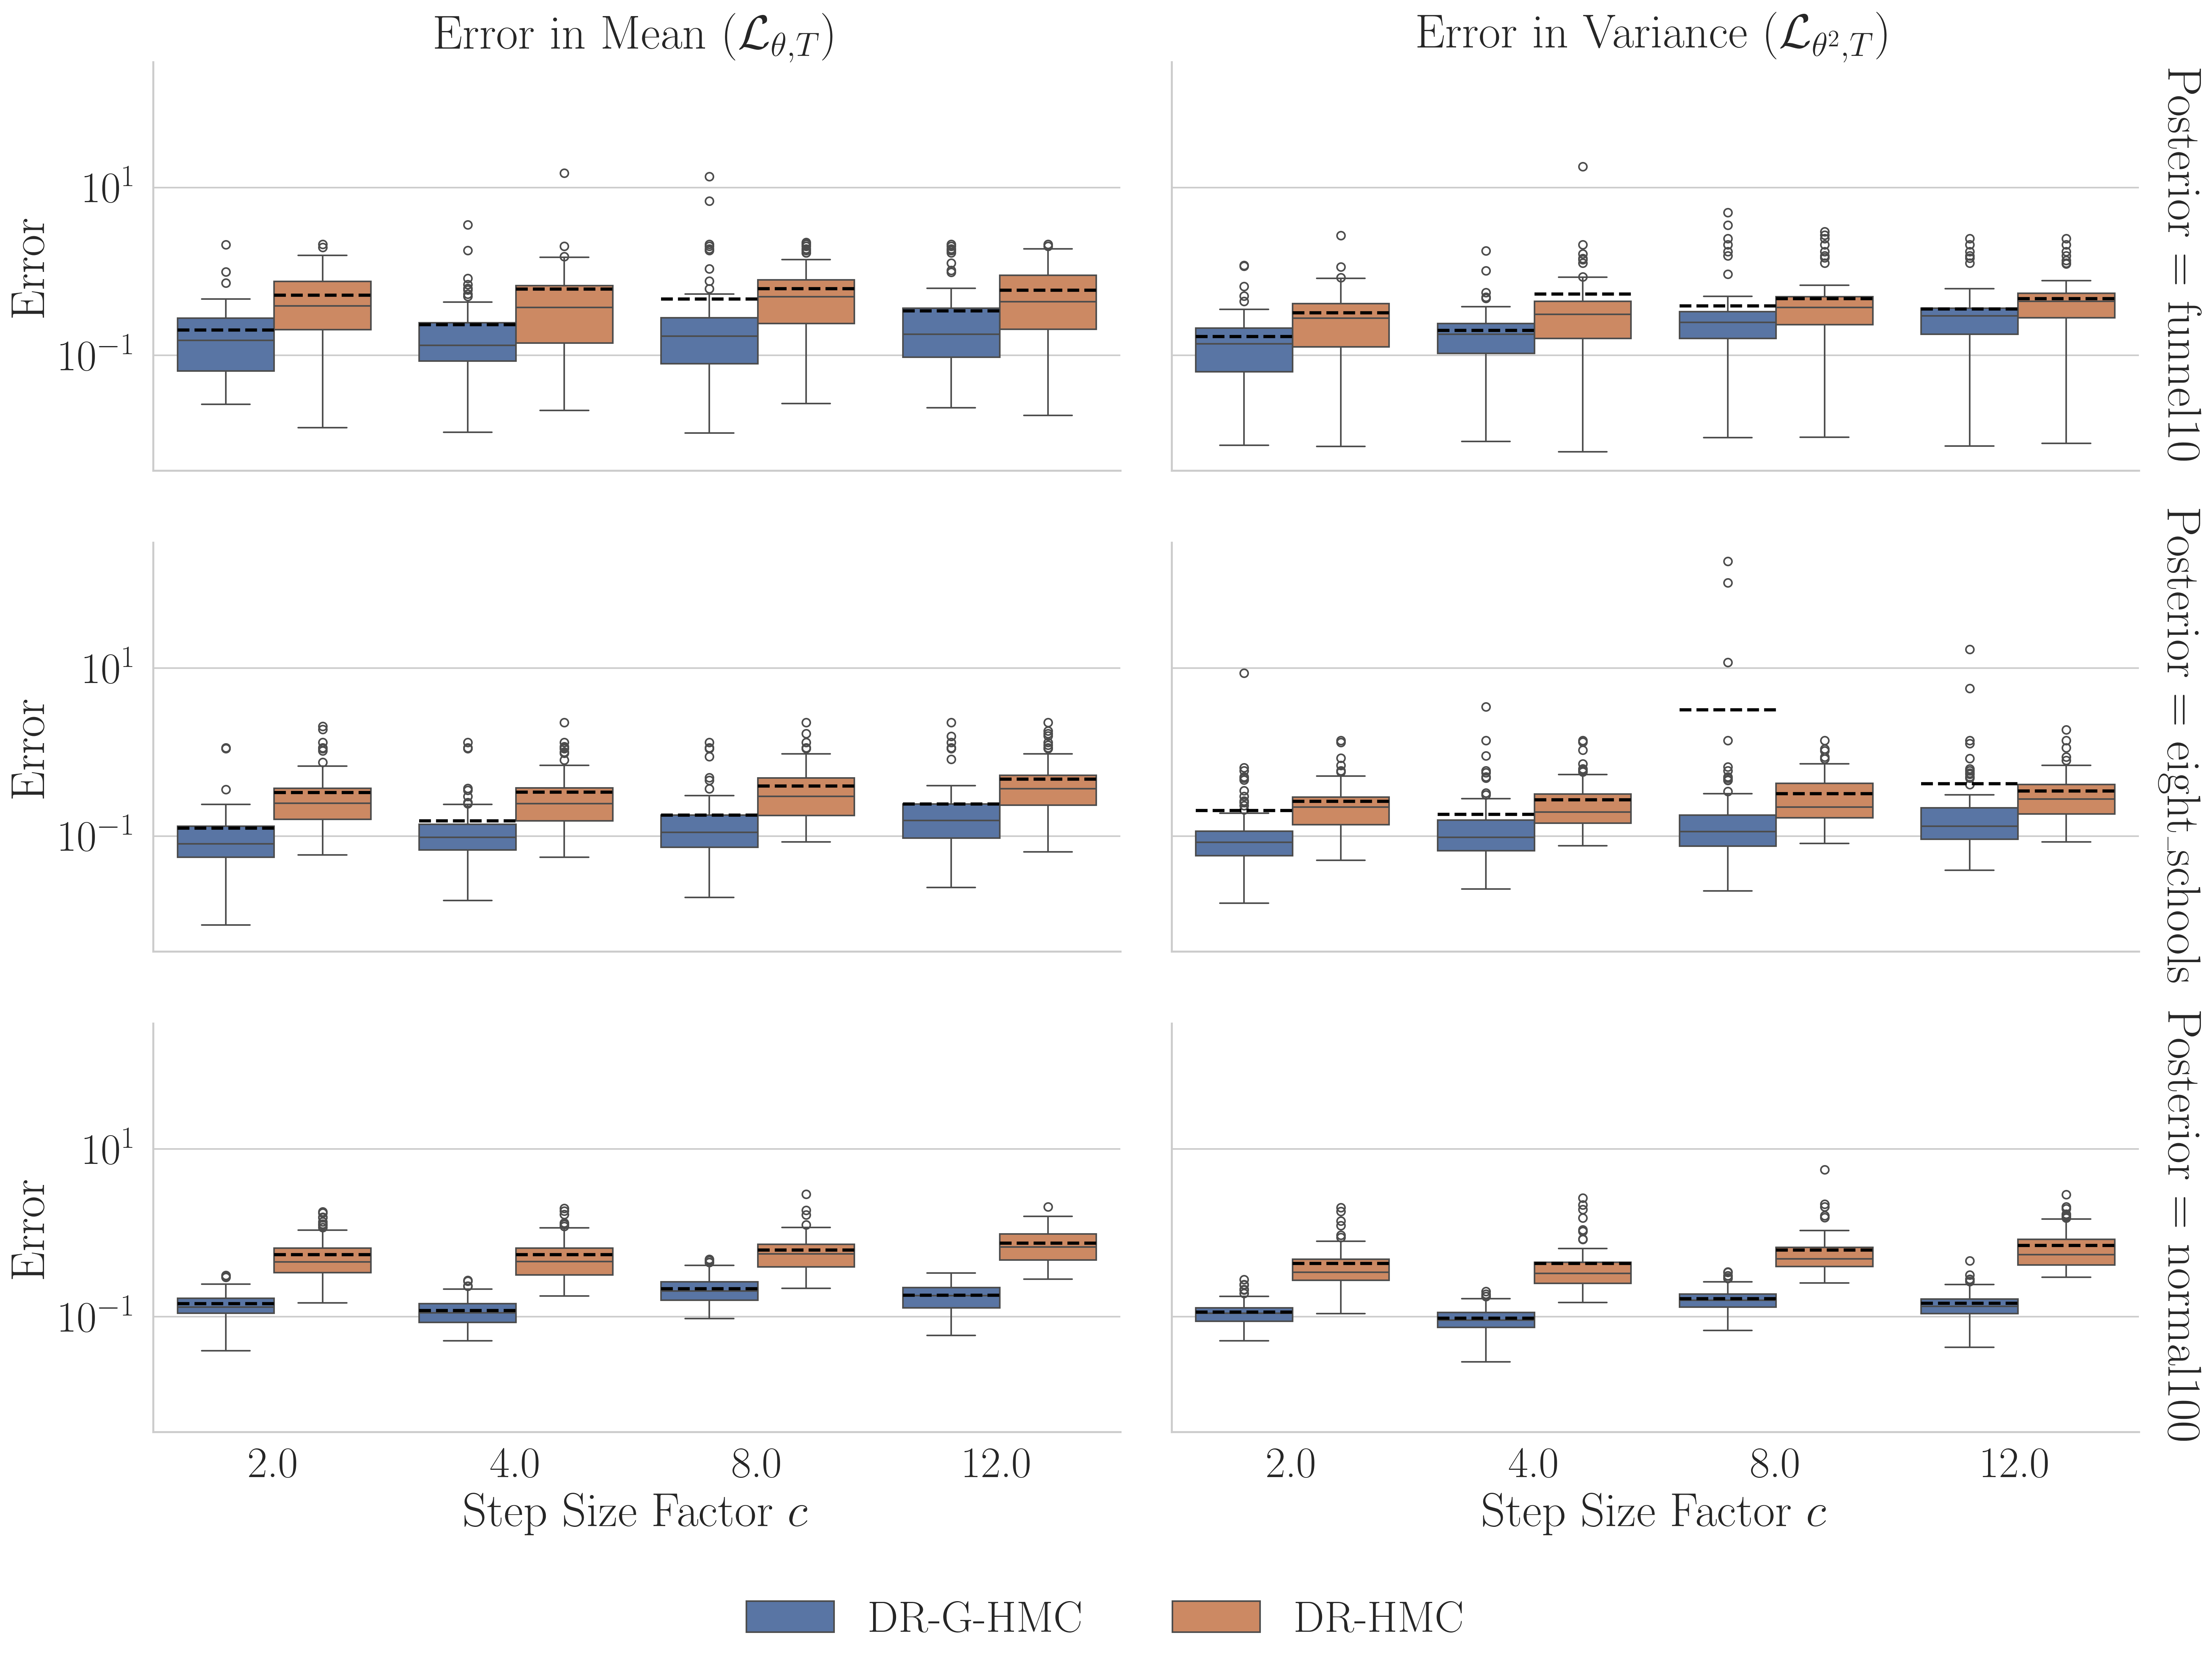

In [132]:
fig = sns.catplot(
    data=data,
    kind="box",
    # errorbar=None,
    y="Error",
    x=hyper_param,
    hue="sampler_type",
    hue_order=hue_order,
    col="Error Type",
    row="Posterior",
    row_order=row_order,
    aspect=2,
    showmeans=True,
    meanline=True,
    meanprops=dict(linestyle="--", linewidth=2, color="black"),
    margin_titles=True,
)

fig.set(yscale="log")
fig.figure.subplots_adjust(bottom=0.15)
sns.move_legend(fig, "lower center", ncol=len(hue_order), title="")
fig.set_ylabels("Error")
fig.set_xlabels(r'Step Size Factor $c$')
fig.axes.flat[0].set_title(r'Error in Mean ($\mathcal{L}_{\theta, T}$)')
fig.axes.flat[1].set_title(r'Error in Variance ($\mathcal{L}_{\theta^2, T}$)')